<a href="https://colab.research.google.com/github/HarshBhajane/DL-Transfer-Learning-for-Dog-and-Cat-Classification/blob/main/DL_Transfer_Learning_for_Dog_and_Cat_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# installing the Kaggle library
!pip install kaggle


In [2]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
# Kaggle api
!kaggle competitions download -c dogs-vs-cats

dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [4]:
!ls

 dogs-vs-cats.zip   kaggle.json   sampleSubmission.csv	 train
'image resized'     sample_data   test1.zip		 train.zip


In [5]:
# extracting the compressed dataset
from zipfile import ZipFile

dataset = '/content/dogs-vs-cats.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [6]:
!dir

dogs-vs-cats.zip  kaggle.json  sampleSubmission.csv  train
image\ resized	  sample_data  test1.zip	     train.zip


In [7]:
# extracting the compressed dataset
from zipfile import ZipFile

dataset = '/content/train.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [8]:
import os
# counting the number of files in train folder
path, dirs, files = next(os.walk('/content/train'))
file_count = len(files)
print('Number of images: ', file_count)

Number of images:  25000


In [9]:
file_names = os.listdir('/content/train/')
print(file_names)

['dog.2073.jpg', 'dog.10754.jpg', 'cat.10548.jpg', 'cat.6976.jpg', 'dog.7670.jpg', 'cat.11346.jpg', 'cat.12105.jpg', 'dog.1937.jpg', 'cat.8012.jpg', 'dog.9352.jpg', 'dog.5024.jpg', 'dog.4962.jpg', 'dog.4327.jpg', 'dog.6874.jpg', 'dog.12160.jpg', 'dog.8258.jpg', 'dog.2165.jpg', 'cat.6248.jpg', 'dog.11985.jpg', 'cat.3307.jpg', 'cat.11979.jpg', 'dog.12170.jpg', 'cat.5955.jpg', 'cat.1220.jpg', 'dog.2607.jpg', 'cat.5446.jpg', 'dog.11295.jpg', 'dog.11941.jpg', 'dog.9837.jpg', 'cat.6268.jpg', 'dog.3074.jpg', 'cat.9628.jpg', 'cat.7532.jpg', 'dog.2155.jpg', 'cat.11384.jpg', 'cat.413.jpg', 'cat.2412.jpg', 'cat.6019.jpg', 'cat.11963.jpg', 'cat.9274.jpg', 'dog.3669.jpg', 'cat.11344.jpg', 'dog.1104.jpg', 'cat.11170.jpg', 'dog.2984.jpg', 'dog.9025.jpg', 'cat.1188.jpg', 'dog.12301.jpg', 'dog.5047.jpg', 'cat.12292.jpg', 'dog.7579.jpg', 'dog.8866.jpg', 'cat.6607.jpg', 'dog.9556.jpg', 'cat.1239.jpg', 'dog.4511.jpg', 'cat.6242.jpg', 'dog.5176.jpg', 'dog.5348.jpg', 'dog.11874.jpg', 'cat.11400.jpg', 'cat.4

In [10]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

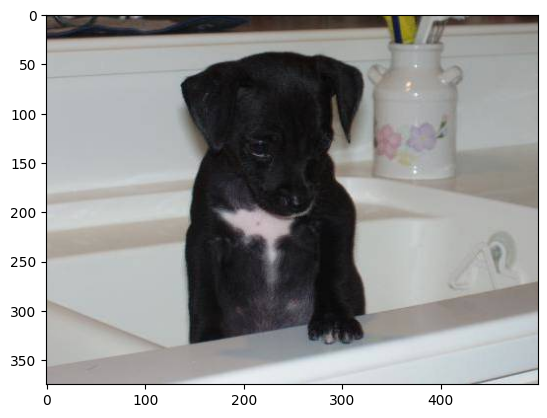

In [11]:
# display dog image
img = mpimg.imread('/content/train/dog.8298.jpg')
imgplt = plt.imshow(img)
plt.show()

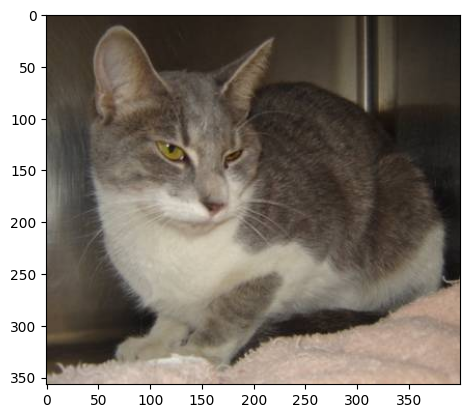

In [12]:
# prompt: # display cat image img = mpimg.imread('/content/train/cat.4352.jpg') imgplt = plt.imshow(img) plt.show()

# display cat image
img = mpimg.imread('/content/train/cat.4352.jpg')
imgplt = plt.imshow(img)
plt.show()


In [13]:
file_names = os.listdir('/content/train/')

for i in range(5):

  name = file_names[i]
  print(name[0:3])


dog
dog
cat
cat
dog


In [14]:
file_names = os.listdir('/content/train/')

dog_count = 0
cat_count = 0

for img_file in file_names:

  name = img_file[0:3]

  if name == 'dog':
    dog_count += 1

  else:
    cat_count += 1

print('Number of dog images =', dog_count)
print('Number of cat images =', cat_count)

Number of dog images = 12500
Number of cat images = 12500


In [16]:
os.mkdir('/content/image resized/')

In [17]:
original_folder = '/content/train/'
resized_folder = '/content/image resized/'

for i in range(2000):

  filename = os.listdir(original_folder)[i]
  img_path = original_folder+filename

  img = Image.open(img_path)
  img = img.resize((224, 224))
  img = img.convert('RGB')

  newImgPath = resized_folder+filename
  img.save(newImgPath)

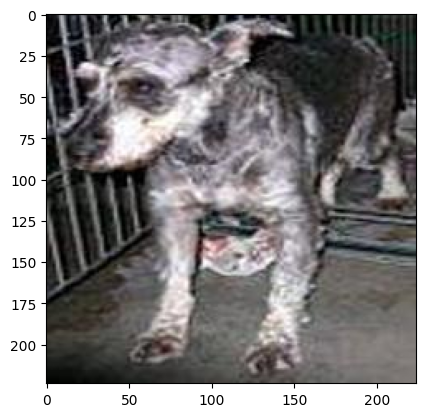

In [45]:
# display resized dog image
img = mpimg.imread('/content/image resized/dog.10001.jpg')
imgplt = plt.imshow(img)
plt.show()

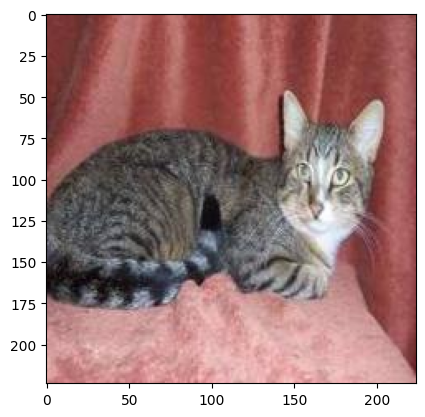

In [44]:
# display resized cat image
img = mpimg.imread('/content/image resized/cat.10004.jpg')
imgplt = plt.imshow(img)
plt.show()

In [20]:
# creaing a for loop to assign labels:- Dog-1, Cat-0
filenames = os.listdir('/content/image resized/')


labels = []

for i in range(2000):

  file_name = filenames[i]
  label = file_name[0:3]

  if label == 'dog':
    labels.append(1)

  else:
    labels.append(0)

In [21]:
print(filenames[0:5])
print(len(filenames))

['dog.2073.jpg', 'dog.10754.jpg', 'cat.10548.jpg', 'cat.6976.jpg', 'dog.7670.jpg']
2000


In [22]:
print(labels[0:5])
print(len(labels))

[1, 1, 0, 0, 1]
2000


In [23]:
# counting the images of dogs and cats out of 2000 images
values, counts = np.unique(labels, return_counts=True)
print(values)
print(counts)

[0 1]
[ 991 1009]


In [24]:
#Converting all the resized images to numpy arrays

In [25]:
import cv2
import glob

In [26]:
image_directory = '/content/image resized/'
image_extension = ['png', 'jpg']

files = []

[files.extend(glob.glob(image_directory + '*.' + e)) for e in image_extension]

dog_cat_images = np.asarray([cv2.imread(file) for file in files])

In [27]:
print(dog_cat_images)

[[[[100  94 141]
   [ 99  93 140]
   [ 98  92 139]
   ...
   [ 39  55  72]
   [ 22  39  60]
   [ 14  32  55]]

  [[ 91  85 132]
   [ 92  86 133]
   [ 94  88 135]
   ...
   [ 26  42  59]
   [ 16  33  54]
   [ 11  29  52]]

  [[ 77  71 118]
   [ 80  74 121]
   [ 86  80 127]
   ...
   [ 25  42  61]
   [ 17  36  57]
   [ 14  35  57]]

  ...

  [[ 77  92 108]
   [ 79  94 110]
   [ 81  96 112]
   ...
   [ 97 103 126]
   [100 106 129]
   [102 108 131]]

  [[ 76  93 106]
   [ 79  96 109]
   [ 82  98 114]
   ...
   [ 99 105 128]
   [103 109 132]
   [105 111 134]]

  [[ 78  95 108]
   [ 82  99 112]
   [ 86 102 118]
   ...
   [ 99 105 128]
   [102 108 131]
   [105 111 134]]]


 [[[219 186 171]
   [219 186 171]
   [219 186 171]
   ...
   [197 154 127]
   [196 153 126]
   [195 152 125]]

  [[219 186 171]
   [219 186 171]
   [219 186 171]
   ...
   [197 154 127]
   [196 153 126]
   [195 152 125]]

  [[219 186 171]
   [219 186 171]
   [219 186 171]
   ...
   [198 155 128]
   [197 154 127]
   [196 153

In [28]:
type(dog_cat_images)

numpy.ndarray

In [29]:
print(dog_cat_images.shape)

(2000, 224, 224, 3)


In [30]:
X = dog_cat_images
Y = np.asarray(labels)

In [31]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [32]:
print(X.shape, X_train.shape, X_test.shape)

(2000, 224, 224, 3) (1600, 224, 224, 3) (400, 224, 224, 3)


In [33]:
# scaling the data
X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [34]:
print(X_train_scaled)

[[[[0.04705882 0.02745098 0.02352941]
   [0.2627451  0.24313725 0.23921569]
   [0.1254902  0.09411765 0.09803922]
   ...
   [0.02745098 0.01568627 0.02352941]
   [0.02745098 0.01568627 0.02352941]
   [0.02352941 0.01176471 0.01960784]]

  [[0.0627451  0.04313725 0.03921569]
   [0.27058824 0.25098039 0.24705882]
   [0.15294118 0.12156863 0.12156863]
   ...
   [0.03137255 0.01960784 0.02745098]
   [0.03137255 0.01960784 0.02745098]
   [0.03137255 0.01960784 0.02745098]]

  [[0.06666667 0.04705882 0.03529412]
   [0.24705882 0.22745098 0.21568627]
   [0.16862745 0.14117647 0.12941176]
   ...
   [0.03529412 0.02352941 0.03137255]
   [0.03529412 0.02352941 0.03137255]
   [0.03529412 0.02352941 0.03137255]]

  ...

  [[0.05490196 0.05882353 0.05098039]
   [0.05490196 0.05882353 0.05098039]
   [0.05490196 0.05882353 0.05098039]
   ...
   [0.88235294 0.85098039 0.82352941]
   [0.88627451 0.85490196 0.82745098]
   [0.89019608 0.85882353 0.83137255]]

  [[0.03137255 0.03529412 0.02745098]
   [0.0

Building the Neural Network

In [35]:
import tensorflow as tf
import tensorflow_hub as hub

In [37]:
mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(224,224,3), trainable=False)

In [38]:
num_of_classes = 2

model = tf.keras.Sequential([

    pretrained_model,
    tf.keras.layers.Dense(num_of_classes)

])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 2260546 (8.62 MB)
Trainable params: 2562 (10.01 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [39]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['acc']
)

In [40]:
model.fit(X_train_scaled, Y_train, epochs=5)

Epoch 1/5
50/50 [==============================] - 59s 1s/step - loss: 0.2684 - acc: 0.8819
Epoch 2/5
50/50 [==============================] - 54s 1s/step - loss: 0.0726 - acc: 0.9794
Epoch 3/5
50/50 [==============================] - 52s 1s/step - loss: 0.0523 - acc: 0.9869
Epoch 4/5
50/50 [==============================] - 55s 1s/step - loss: 0.0440 - acc: 0.9869
Epoch 5/5
50/50 [==============================] - 55s 1s/step - loss: 0.0351 - acc: 0.9900


In [41]:
score, acc = model.evaluate(X_test_scaled, Y_test)
print('Test Loss =', score)
print('Test Accuracy =', acc)

13/13 [==============================] - 16s 1s/step - loss: 0.0381 - acc: 0.9825
Test Loss = 0.038083624094724655
Test Accuracy = 0.9825000166893005


Path of the image to be predicted: /content/dog.jpeg


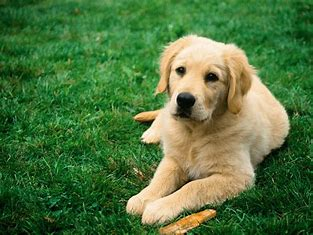

1/1 [==============================] - 1s 575ms/step
[[-3.158897   3.8788095]]
1
The image represents a Dog


In [42]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print('The image represents a Cat')

else:
  print('The image represents a Dog')

Path of the image to be predicted: /content/cat.jpeg


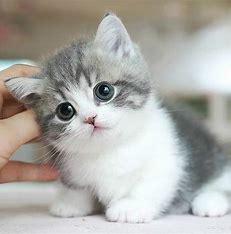

1/1 [==============================] - 0s 54ms/step
[[ 4.3778343 -2.1059256]]
0
The image represents a Cat


In [43]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print('The image represents a Cat')

else:
  print('The image represents a Dog')